In [6]:
import numpy as np   
import pandas as pd    

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
from warnings import filterwarnings
filterwarnings("ignore")
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import scale

In [ ]:
#pip install tensorflow --ignore-installed --user

In [7]:
# reading the excel file into pandas dataframe

df_train = pd.read_csv("DS_DF_WQI_Train.csv") 
df_test = pd.read_csv("DS_DF_WQI_Test.csv") 

In [8]:
df_train.head()

,SMPLDATETIME,STNCODE,USRCODES,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class
0,2004-01-01 00:00:00,deldswq,00:00:00,5.2,0.13,0.1,101.9,12.9,0.45,6.6,0.012,12.639779,Excellent
1,2004-01-01 00:30:00,deldswq,00:30:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.013,12.636899,Excellent
2,2004-01-01 01:00:00,deldswq,01:00:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.012,12.631159,Excellent
3,2004-01-01 01:30:00,deldswq,01:30:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.013,12.349211,Excellent
4,2004-01-01 02:00:00,deldswq,02:00:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.012,12.343470,Excellent


In [4]:
df_test.head()

,SMPLDATETIME,STNCODE,USRCODES,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class
0,2006-02-25 01:00:00,deldswq,01:00:00,4.4,0.2,0.1,97.5,12.7,0.46,7.1,0.009,9.620504,Excellent
1,2006-02-25 01:30:00,deldswq,01:30:00,4.3,0.2,0.1,97.5,12.7,0.46,7.1,0.009,9.604559,Excellent
2,2006-02-25 02:00:00,deldswq,02:00:00,4.3,0.2,0.1,97.3,12.7,0.45,7.1,0.009,9.600074,Excellent
3,2006-02-25 02:30:00,deldswq,02:30:00,4.3,0.2,0.1,97.2,12.6,0.45,7.1,0.009,9.875953,Excellent
4,2006-02-25 03:00:00,deldswq,03:00:00,4.3,0.2,0.1,97.1,12.6,0.45,7.1,0.009,9.873710,Excellent


In [5]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33138 entries, 0 to 33137
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SMPLDATETIME  33138 non-null  object 
 1   STNCODE       33138 non-null  object 
 2   USRCODES      33138 non-null  object 
 3   Temp          33138 non-null  float64
 4   SpCond        33138 non-null  float64
 5   Sal           33138 non-null  float64
 6   DO_pct        33138 non-null  float64
 7   DO_mgl        33138 non-null  float64
 8   Depth         33138 non-null  float64
 9   pH            33138 non-null  float64
 10  Turb          33138 non-null  float64
 11  WQI           33138 non-null  float64
 12  WQI_Class     33138 non-null  object 
dtypes: float64(9), object(4)
memory usage: 3.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14202 entries, 0 to 14201
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SMPLDATETIME  14202 non-null  object 
 1   STNCODE       14202 non-null  object 
 2   USRCODES      14202 non-null  object 
 3   Temp          14202 non-null  float64
 4   SpCond        14202 non-null  float64
 5   Sal           14202 non-null  float64
 6   DO_pct        14202 non-null  float64
 7   DO_mgl        14202 non-null  float64
 8   Depth         14202 non-null  float64
 9   pH            14202 non-null  float64
 10  Turb          14202 non-null  float64
 11  WQI           14202 non-null  float64
 12  WQI_Class     14202 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.4+ MB


None

In [6]:
# Checking for NULL Values

display(df_train.isnull().sum())
display(df_test.isnull().sum())

SMPLDATETIME    0
STNCODE         0
USRCODES        0
Temp            0
SpCond          0
Sal             0
DO_pct          0
DO_mgl          0
Depth           0
pH              0
Turb            0
WQI             0
WQI_Class       0
dtype: int64

SMPLDATETIME    0
STNCODE         0
USRCODES        0
Temp            0
SpCond          0
Sal             0
DO_pct          0
DO_mgl          0
Depth           0
pH              0
Turb            0
WQI             0
WQI_Class       0
dtype: int64

In [9]:
df_train['Date_Time'] = pd.to_datetime(df_train['SMPLDATETIME'])

In [10]:
df_train.head()

,SMPLDATETIME,STNCODE,USRCODES,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class,Date_Time
0,2004-01-01 00:00:00,deldswq,00:00:00,5.2,0.13,0.1,101.9,12.9,0.45,6.6,0.012,12.639779,Excellent,2004-01-01 00:00:00
1,2004-01-01 00:30:00,deldswq,00:30:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.013,12.636899,Excellent,2004-01-01 00:30:00
2,2004-01-01 01:00:00,deldswq,01:00:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.012,12.631159,Excellent,2004-01-01 01:00:00
3,2004-01-01 01:30:00,deldswq,01:30:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.013,12.349211,Excellent,2004-01-01 01:30:00
4,2004-01-01 02:00:00,deldswq,02:00:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.012,12.343470,Excellent,2004-01-01 02:00:00


In [11]:
df_train.drop(['SMPLDATETIME'], axis = 1, inplace = True)

In [12]:
df_train = df_train.set_index(['Date_Time'])
df_train.head()

,STNCODE,USRCODES,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI,WQI_Class
Date_Time,,,,,,,,,,,,
2004-01-01 00:00:00,deldswq,00:00:00,5.2,0.13,0.1,101.9,12.9,0.45,6.6,0.012,12.639779,Excellent
2004-01-01 00:30:00,deldswq,00:30:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.013,12.636899,Excellent
2004-01-01 01:00:00,deldswq,01:00:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.012,12.631159,Excellent
2004-01-01 01:30:00,deldswq,01:30:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.013,12.349211,Excellent
2004-01-01 02:00:00,deldswq,02:00:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.012,12.343470,Excellent


In [125]:
print("no. of rows: ",df_train.shape[0], "\n""no. of columns: ",df_train.shape[1])
print("no. of rows: ",df_test.shape[0], "\n""no. of columns: ",df_test.shape[1])

no. of rows:  33138 
no. of columns:  9
no. of rows:  14202 
no. of columns:  9


In [14]:
# to find duplicates 

dups1 = df_train.duplicated()
print('Number of duplicate rows in train = %d' % (dups1.sum()))
dups2 = df_test.duplicated()
print('Number of duplicate rows in test= %d' % (dups2.sum()))

Number of duplicate rows in train = 0
Number of duplicate rows in test= 0


In [15]:
df_train_num = df_train.select_dtypes(include = ['float64', 'int64'])
numeric_columns_train = list(df_train_num.columns.values)
print("The number of Numeric columns in the Train dataset is: ",len(numeric_columns_train))

df_test_num = df_test.select_dtypes(include = ['float64', 'int64'])
numeric_columns_test = list(df_test_num.columns.values)
print("The number of Numeric columns in the Test dataset is: ",len(numeric_columns_test))

The number of Numeric columns in the Train dataset is:  9
The number of Numeric columns in the Test dataset is:  9


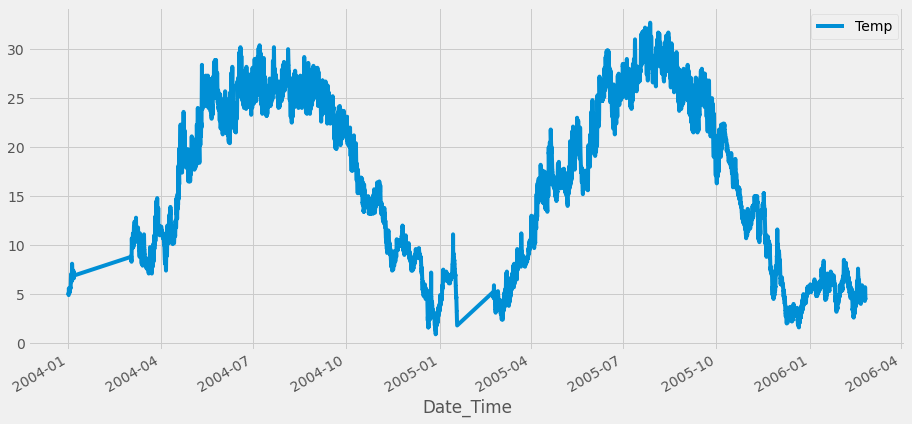

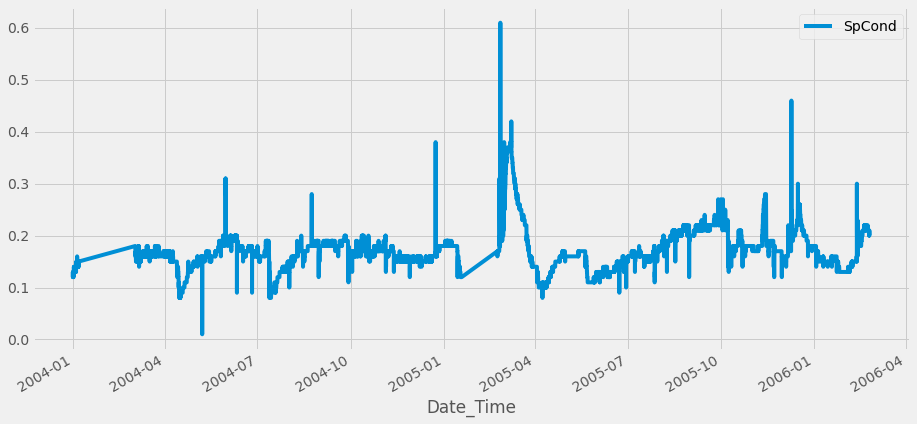

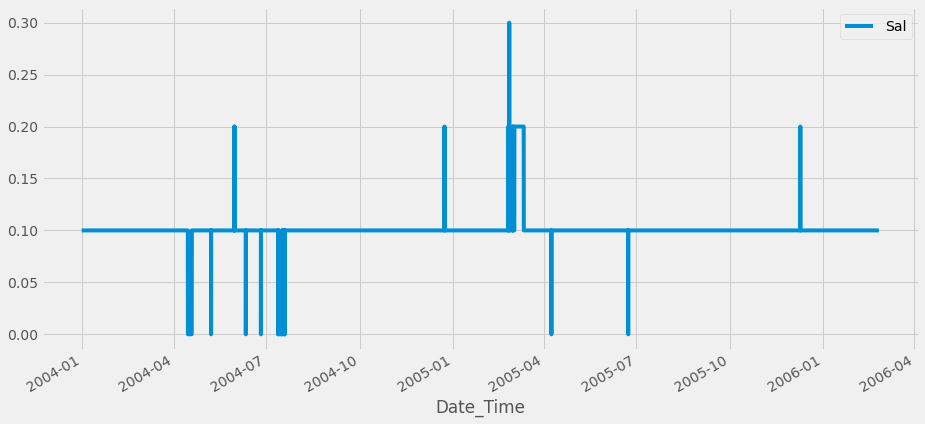

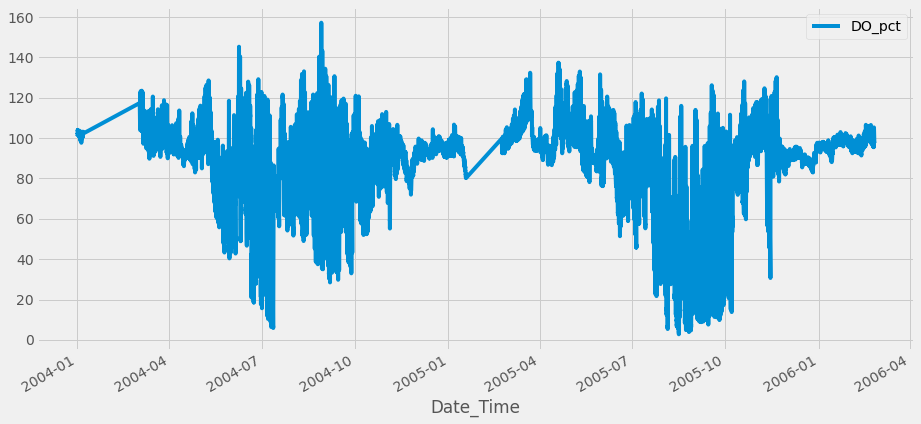

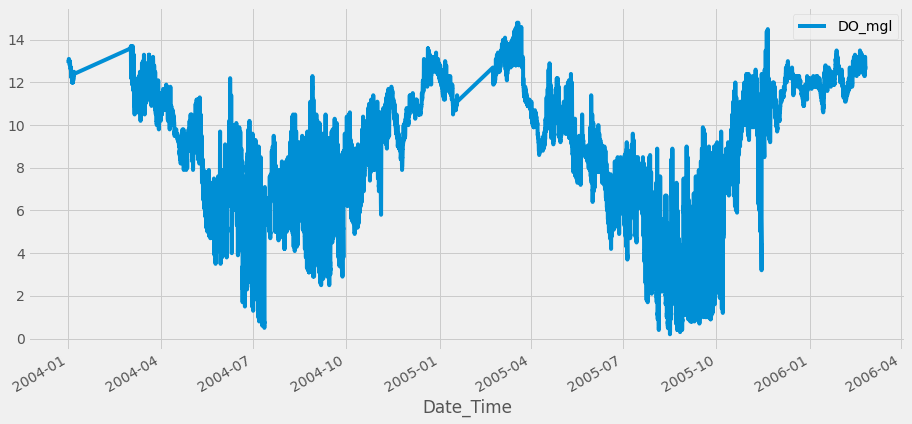

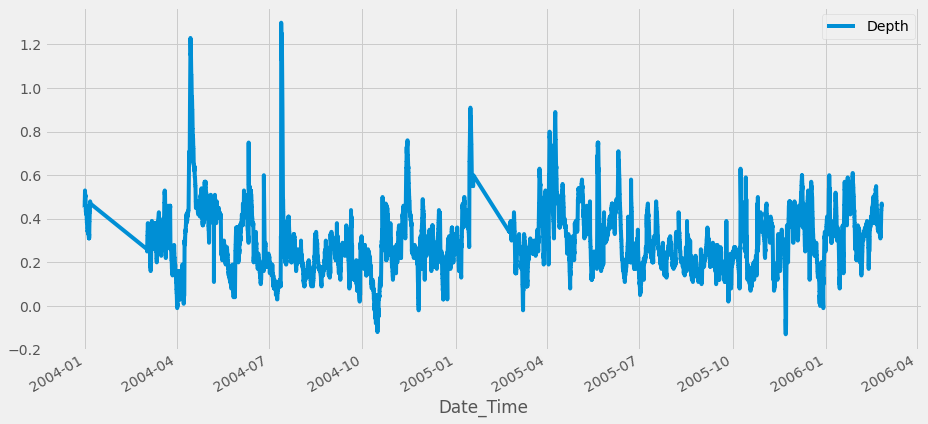

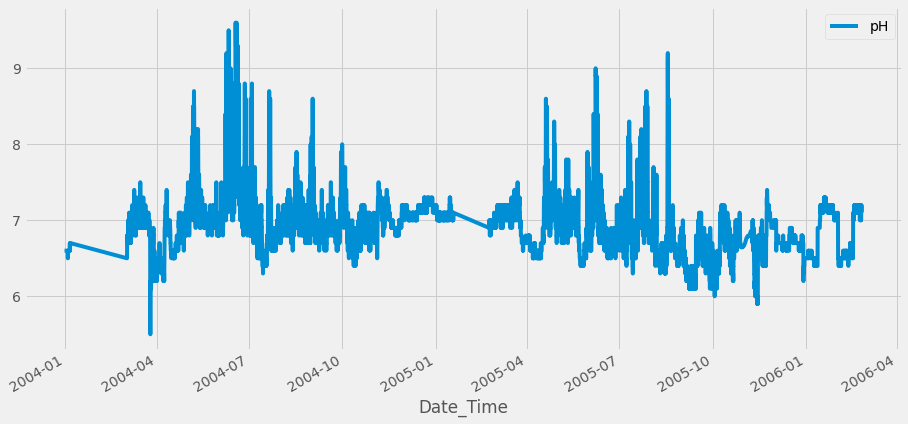

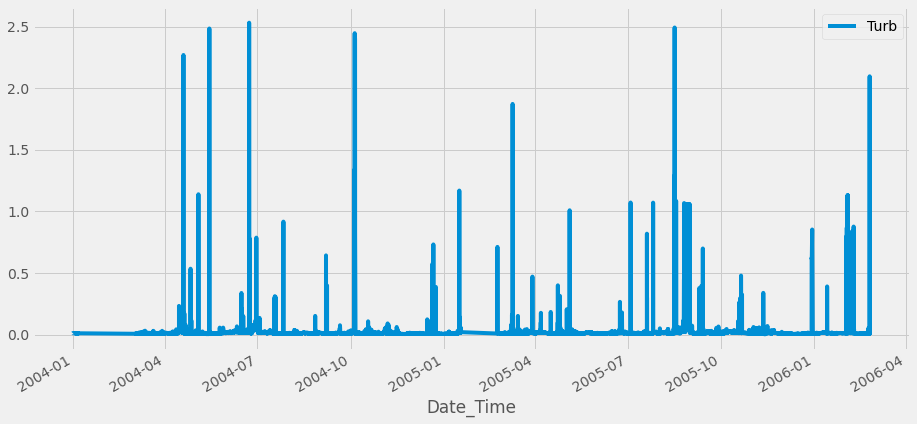

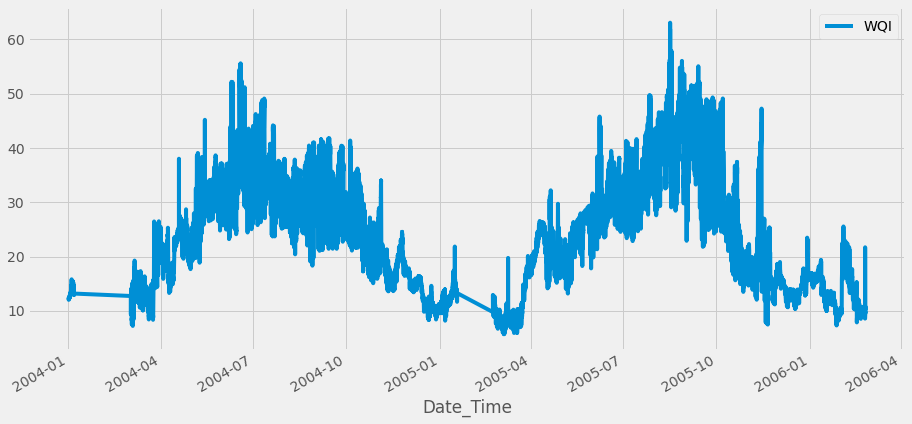

In [124]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
plt.style.use("fivethirtyeight")
for col in df_train_num.columns:
    df_train.plot(y = col)
    plt.show()

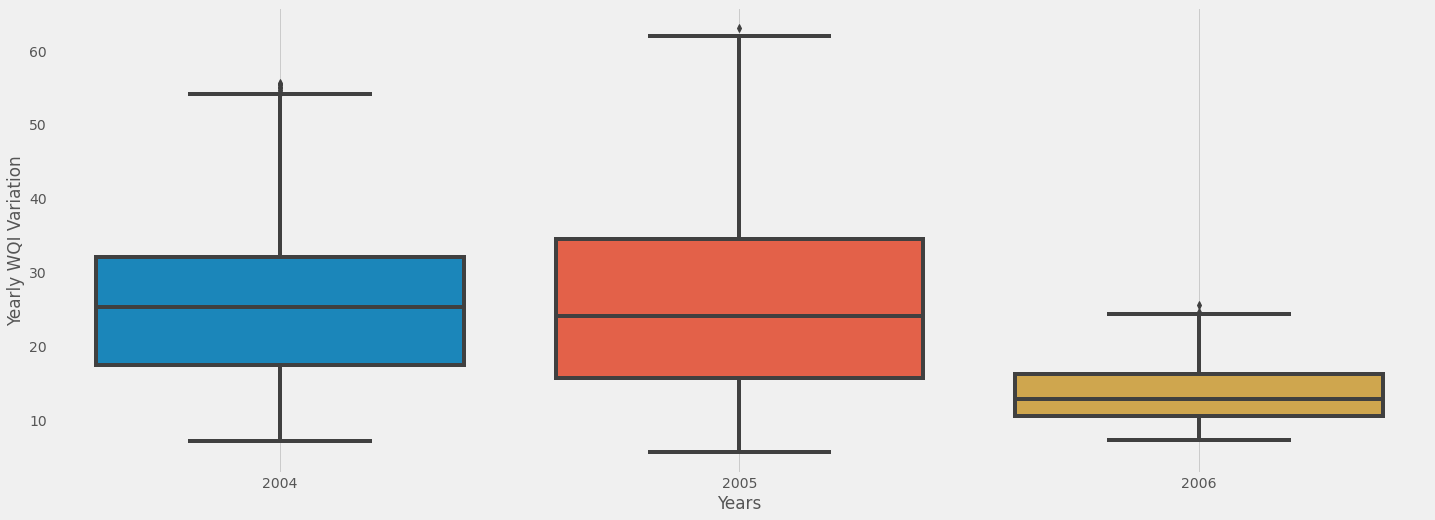

In [126]:
#whis :    Proportion of the IQR past the low and high quartiles to extend the
    # plot whiskers. Points outside this range will be identified as outliers.##
    

fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_train.index.year, df_train.WQI, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly WQI Variation');

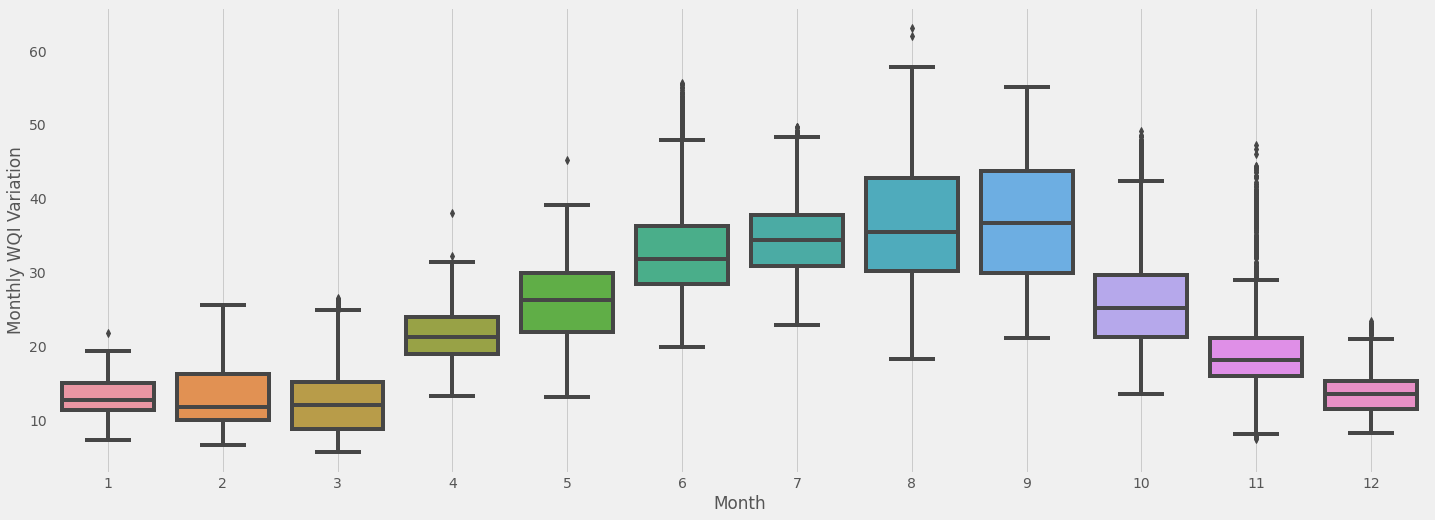

In [127]:
#whis :    Proportion of the IQR past the low and high quartiles to extend the
    # plot whiskers. Points outside this range will be identified as outliers.##
    

fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_train.index.month, df_train.WQI, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Month');
plt.ylabel('Monthly WQI Variation');

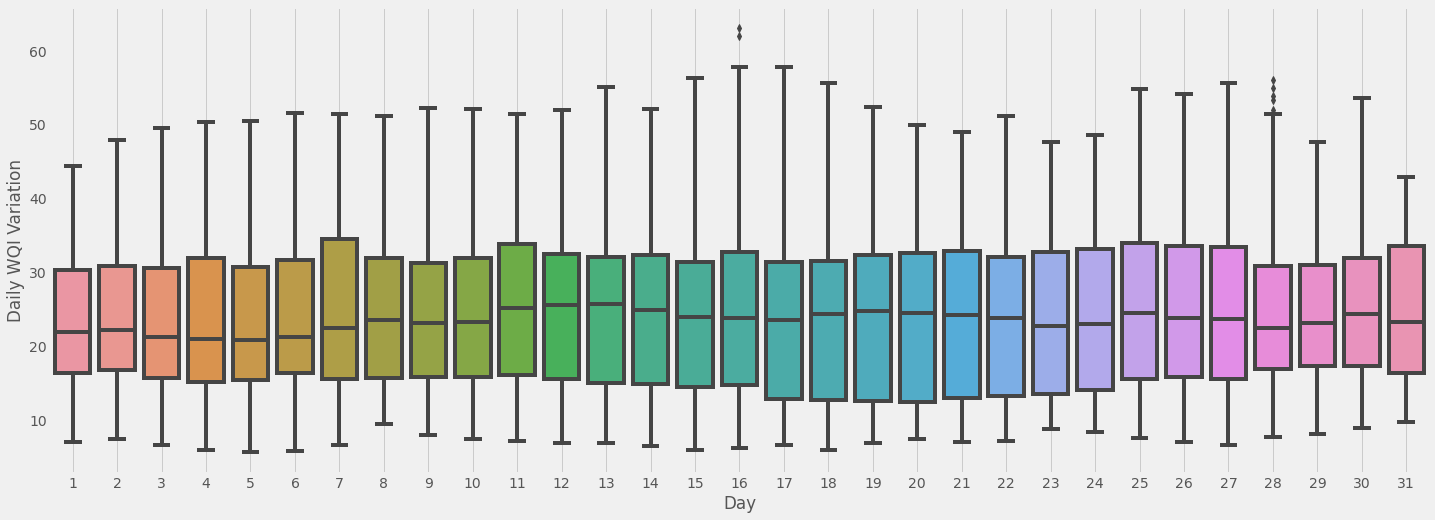

In [130]:
#whis :    Proportion of the IQR past the low and high quartiles to extend the
    # plot whiskers. Points outside this range will be identified as outliers.##
    

fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_train.index.day, df_train.WQI, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Day');
plt.ylabel('Daily WQI Variation');

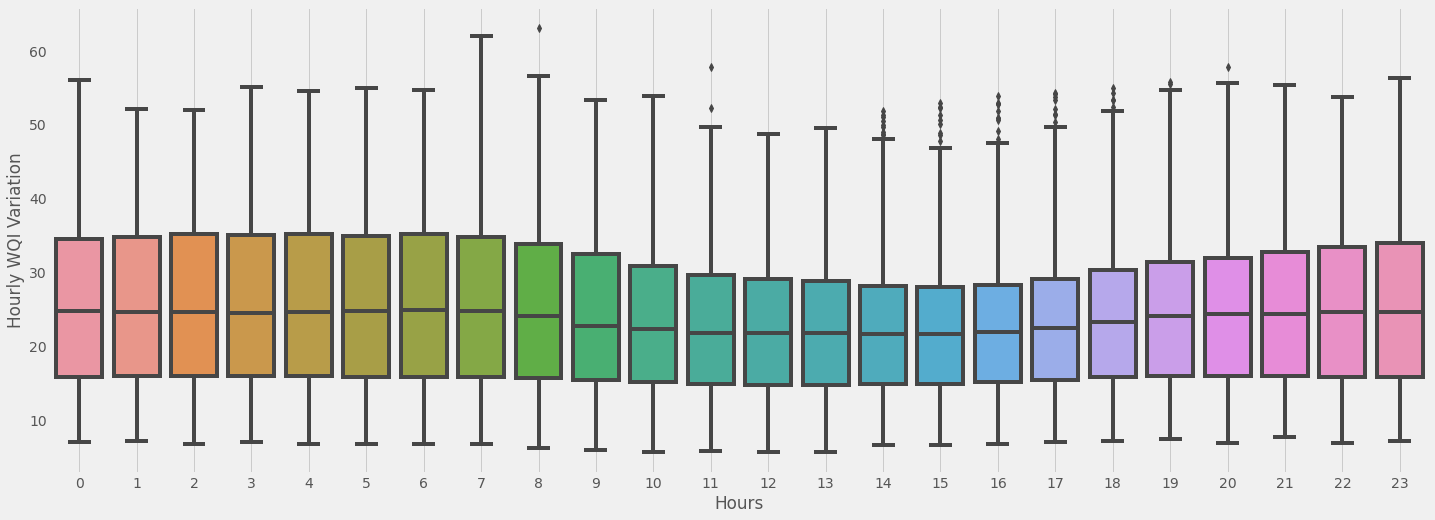

In [131]:
#whis :    Proportion of the IQR past the low and high quartiles to extend the
    # plot whiskers. Points outside this range will be identified as outliers.##
    

fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_train.index.hour, df_train.WQI, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Hours');
plt.ylabel('Hourly WQI Variation');

In [17]:
## drop object columns

df_train = df_train.drop(['STNCODE'], axis = 1)
df_train = df_train.drop(['USRCODES'], axis = 1)
df_train = df_train.drop(['WQI_Class'], axis = 1)

In [43]:
df_train.head()

,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI
Date_Time,,,,,,,,,
2004-01-01 00:00:00,5.2,0.13,0.1,101.9,12.9,0.45,6.6,0.012,12.639779
2004-01-01 00:30:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.013,12.636899
2004-01-01 01:00:00,5.2,0.12,0.1,101.8,12.9,0.45,6.6,0.012,12.631159
2004-01-01 01:30:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.013,12.349211
2004-01-01 02:00:00,5.1,0.13,0.1,101.8,13.0,0.46,6.6,0.012,12.343470


In [19]:
df_train.describe()

,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI
count,33138.000000,33138.000000,33138.000000,33138.000000,33138.000000,33138.000000,33138.000000,33138.000000,33138.000000
mean,16.416166,0.170768,0.100368,84.594402,8.719715,0.297306,6.896084,0.017879,24.446340
std,8.516762,0.038114,0.016180,23.269814,3.181803,0.151005,0.388328,0.070703,10.695210
min,0.900000,0.010000,0.000000,2.800000,0.200000,-0.130000,5.500000,0.003000,5.695915
25%,8.400000,0.150000,0.100000,76.500000,6.500000,0.200000,6.700000,0.008000,15.507938
50%,16.500000,0.170000,0.100000,92.000000,9.200000,0.280000,6.900000,0.010000,23.425735
75%,24.700000,0.180000,0.100000,98.200000,11.400000,0.380000,7.100000,0.014000,32.214438
max,32.700000,0.610000,0.300000,157.200000,14.800000,1.300000,9.600000,2.531000,63.059231


## SCALING DATA PRE-REQUISITE FOR NEURAL NETWORK MODEL

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler_min = MinMaxScaler()

df_train_scaled = scaler_min.fit_transform(df_train)

In [22]:
df_train_scaled

array([[0.13522013, 0.2       , 0.33333333, ..., 0.26829268, 0.00356013,
        0.1210506 ],
       [0.13522013, 0.18333333, 0.33333333, ..., 0.26829268, 0.0039557 ,
        0.12100039],
       [0.13522013, 0.18333333, 0.33333333, ..., 0.26829268, 0.00356013,
        0.12090032],
       ...,
       [0.11006289, 0.31666667, 0.33333333, ..., 0.3902439 , 0.00237342,
        0.06853363],
       [0.11006289, 0.31666667, 0.33333333, ..., 0.3902439 , 0.00237342,
        0.06845545],
       [0.11006289, 0.31666667, 0.33333333, ..., 0.3902439 , 0.00237342,
        0.07326477]])

The features colummn has the entire data_scaled value. The "target" column has only the Target variable " WQI"

In [23]:
features = df_train_scaled
target = df_train_scaled[:,8]

In [135]:
target

array([0.1210506 , 0.12100039, 0.12090032, ..., 0.06853363, 0.06845545,
       0.07326477])

In [37]:
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf

In [30]:
TimeseriesGenerator(features, target, length = 2 , sampling_rate = 1 , batch_size = 1)[0]

(array([[[0.13522013, 0.2       , 0.33333333, 0.64183938, 0.86986301,
          0.40559441, 0.26829268, 0.00356013, 0.1210506 ],
         [0.13522013, 0.18333333, 0.33333333, 0.64119171, 0.86986301,
          0.40559441, 0.26829268, 0.0039557 , 0.12100039]]]),
 array([0.12090032]))

In [34]:
win_length = 240
batch_size = 32
num_features = 9
train_generator = TimeseriesGenerator(features, target, length = win_length , sampling_rate = 1 , batch_size = batch_size)
## TRAIN DATA - 

In [36]:
train_generator[0]

(array([[[0.13522013, 0.2       , 0.33333333, ..., 0.26829268,
          0.00356013, 0.1210506 ],
         [0.13522013, 0.18333333, 0.33333333, ..., 0.26829268,
          0.0039557 , 0.12100039],
         [0.13522013, 0.18333333, 0.33333333, ..., 0.26829268,
          0.00356013, 0.12090032],
         ...,
         [0.20440252, 0.23333333, 0.33333333, ..., 0.26829268,
          0.00276899, 0.16542832],
         [0.20125786, 0.23333333, 0.33333333, ..., 0.26829268,
          0.00276899, 0.16515034],
         [0.19811321, 0.21666667, 0.33333333, ..., 0.26829268,
          0.00276899, 0.16480027]],
 
        [[0.13522013, 0.18333333, 0.33333333, ..., 0.26829268,
          0.0039557 , 0.12100039],
         [0.13522013, 0.18333333, 0.33333333, ..., 0.26829268,
          0.00356013, 0.12090032],
         [0.13207547, 0.2       , 0.33333333, ..., 0.26829268,
          0.0039557 , 0.1159852 ],
         ...,
         [0.20125786, 0.23333333, 0.33333333, ..., 0.26829268,
          0.00276899, 0.

In [44]:
## processing test data

df_test['Date_Time'] = pd.to_datetime(df_test['SMPLDATETIME'])
df_test.drop(['SMPLDATETIME'], axis = 1, inplace = True)
df_test = df_test.set_index(['Date_Time'])
df_test = df_test.drop(['STNCODE'], axis = 1)
df_test = df_test.drop(['USRCODES'], axis = 1)
df_test = df_test.drop(['WQI_Class'], axis = 1)
df_test.head()

,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI
Date_Time,,,,,,,,,
2006-02-25 01:00:00,4.4,0.2,0.1,97.5,12.7,0.46,7.1,0.009,9.620504
2006-02-25 01:30:00,4.3,0.2,0.1,97.5,12.7,0.46,7.1,0.009,9.604559
2006-02-25 02:00:00,4.3,0.2,0.1,97.3,12.7,0.45,7.1,0.009,9.600074
2006-02-25 02:30:00,4.3,0.2,0.1,97.2,12.6,0.45,7.1,0.009,9.875953
2006-02-25 03:00:00,4.3,0.2,0.1,97.1,12.6,0.45,7.1,0.009,9.873710


In [45]:
df_test_scaled = scaler_min.fit_transform(df_test)
features_test = df_test_scaled
target_test = df_test_scaled[:,8]
test_generator = TimeseriesGenerator(features_test, target_test, length = win_length , sampling_rate = 1 , batch_size = batch_size)

In [46]:
test_generator[0]

(array([[[0.04901961, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.0806136 ],
         [0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.08027209],
         [0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.08017604],
         ...,
         [0.05555556, 0.36666667, 0.5       , ..., 0.36666667,
          0.0018797 , 0.0982825 ],
         [0.05555556, 0.36666667, 0.5       , ..., 0.36666667,
          0.0018797 , 0.09823447],
         [0.05228758, 0.36666667, 0.5       , ..., 0.36666667,
          0.0018797 , 0.09779691]],
 
        [[0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.08027209],
         [0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.08017604],
         [0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.0860846 ],
         ...,
         [0.05555556, 0.36666667, 0.5       , ..., 0.36666667,
          0.0018797 , 0.

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences = False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 240, 128)          70656     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 240, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 240, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 240, 128)          0         
                                                                 
 dropout (Dropout)           (None, 240, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [54]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 2, mode = 'min')

model.compile(loss = tf.losses.MeanSquaredError(), optimizer = tf.optimizers.Adam(), metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs = 5, validation_data = test_generator, shuffle = False, callbacks = [early_stopping])

Epoch 1/5
1029/1029 [==============================] - 701s 676ms/step - loss: 0.0029 - mean_absolute_error: 0.0398 - val_loss: 0.0415 - val_mean_absolute_error: 0.1891
Epoch 2/5
1029/1029 [==============================] - 698s 678ms/step - loss: 0.0025 - mean_absolute_error: 0.0384 - val_loss: 0.0350 - val_mean_absolute_error: 0.1715
Epoch 3/5
1029/1029 [==============================] - 1036s 1s/step - loss: 0.0022 - mean_absolute_error: 0.0359 - val_loss: 0.0257 - val_mean_absolute_error: 0.1441
Epoch 4/5
1029/1029 [==============================] - 1542s 1s/step - loss: 0.0019 - mean_absolute_error: 0.0334 - val_loss: 0.0165 - val_mean_absolute_error: 0.1126
Epoch 5/5
1029/1029 [==============================] - 1425s 1s/step - loss: 0.0017 - mean_absolute_error: 0.0311 - val_loss: 0.0089 - val_mean_absolute_error: 0.0802


In [136]:
model.evaluate_generator(test_generator, verbose = 0)

[0.008909563533961773, 0.08022452145814896]

In [141]:
predictions = model.predict_generator(test_generator)

In [142]:
predictions.shape

(13962, 1)

In [150]:
len(test_generator[1])

2

In [151]:
len(target_test)

14202

In [71]:
len(features_test)

14202

In [74]:
len(features_test[:,1:][win_length:])

13962

In [76]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(features_test[:,1:][win_length:])] , axis = 1)

In [143]:
df_pred.shape

(13962, 9)

In [78]:
rev_trans = scaler_min.inverse_transform(df_pred)

In [96]:
rev_trans[:,8]

array([10.4295435 , 10.43974868, 10.43304157, ..., 16.57974557,
       16.57974557, 16.57526087])

In [144]:
rev_trans.shape

(13962, 9)

In [145]:
df_test.shape

(14202, 9)

In [87]:
df_final = df_test[predictions.shape[0]*-1] #because the data only has 13962 obs rather than 14202

In [147]:
df_final.columns

Index(['Temp', 'SpCond', 'Sal', 'DO_pct', 'DO_mgl', 'Depth', 'pH', 'Turb',
       'WQI', 'Predicted_WQI'],
      dtype='object')

In [102]:
len(predictions)

13962

In [88]:
df_final.count()

Temp      13962
SpCond    13962
Sal       13962
DO_pct    13962
DO_mgl    13962
Depth     13962
pH        13962
Turb      13962
WQI       13962
dtype: int64

In [149]:
df_final.head()

,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI,Predicted_WQI
Date_Time,,,,,,,,,,
2006-03-02 01:00:00,4.5,0.19,0.1,96.2,12.4,0.28,7.1,0.008,10.429544,10.429544
2006-03-02 01:30:00,4.6,0.19,0.1,96.2,12.4,0.28,7.1,0.007,10.439749,10.439749
2006-03-02 02:00:00,4.5,0.19,0.1,96.1,12.4,0.28,7.1,0.009,10.433042,10.433042
2006-03-02 02:30:00,4.5,0.19,0.1,96.1,12.4,0.27,7.1,0.008,10.427301,10.427301
2006-03-02 03:00:00,4.6,0.19,0.1,96.0,12.4,0.27,7.1,0.008,10.441004,10.441004


In [90]:
df_test.count()

Temp      14202
SpCond    14202
Sal       14202
DO_pct    14202
DO_mgl    14202
Depth     14202
pH        14202
Turb      14202
WQI       14202
dtype: int64

In [97]:
df_final['Predicted_WQI'] = rev_trans[:,8]

In [98]:
df_final

,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI,Predicted_WQI
Date_Time,,,,,,,,,,
2006-03-02 01:00:00,4.5,0.19,0.1,96.2,12.4,0.28,7.1,0.008,10.429544,10.429544
2006-03-02 01:30:00,4.6,0.19,0.1,96.2,12.4,0.28,7.1,0.007,10.439749,10.439749
2006-03-02 02:00:00,4.5,0.19,0.1,96.1,12.4,0.28,7.1,0.009,10.433042,10.433042
2006-03-02 02:30:00,4.5,0.19,0.1,96.1,12.4,0.27,7.1,0.008,10.427301,10.427301
2006-03-02 03:00:00,4.6,0.19,0.1,96.0,12.4,0.27,7.1,0.008,10.441004,10.441004
...,...,...,...,...,...,...,...,...,...,...
2006-12-31 21:30:00,7.7,0.17,0.1,86.9,10.4,0.40,6.9,0.011,16.298147,16.298147
2006-12-31 22:00:00,7.7,0.17,0.1,87.0,10.4,0.40,6.9,0.010,16.294648,16.294648
2006-12-31 22:30:00,7.8,0.17,0.1,86.6,10.3,0.39,6.9,0.010,16.579746,16.579746


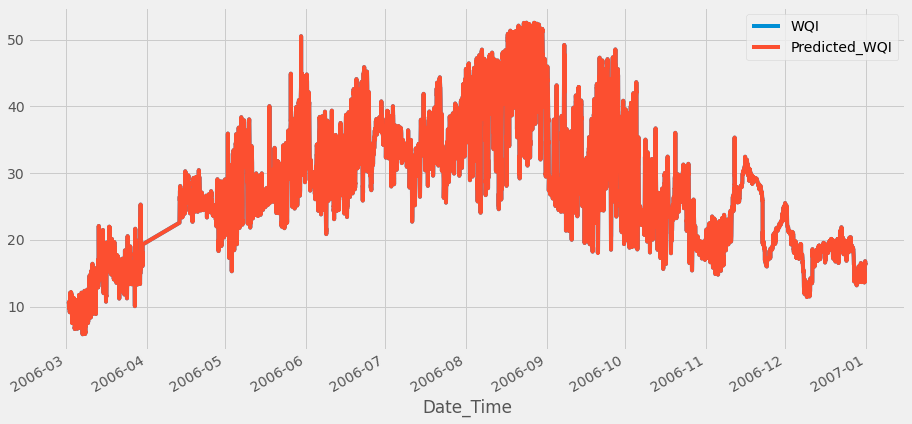

In [133]:
df_final[['WQI',  'Predicted_WQI' ]].plot();

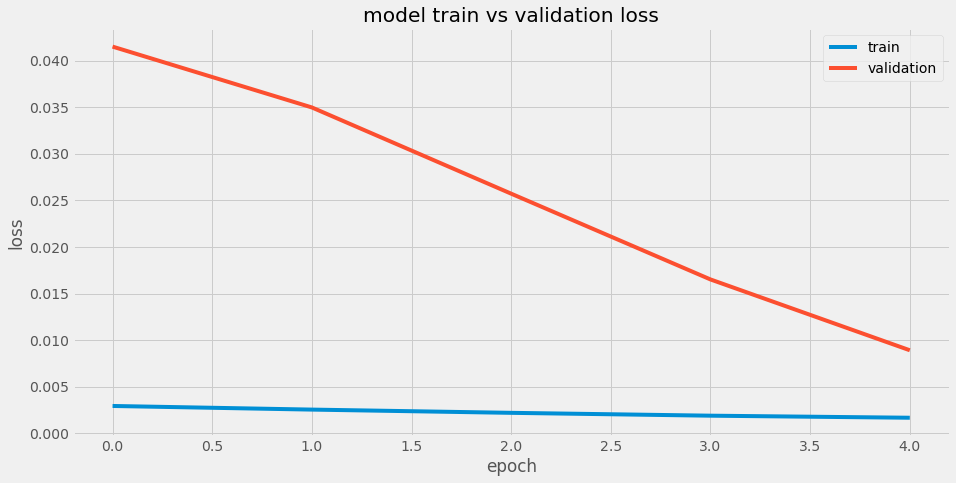

In [153]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [156]:
print(history.history['loss'])
#print(history.history['accuracy'])
print(history.history['val_loss'])
#print(history.history['val_accuracy'])

[0.0029318146407604218, 0.002542317844927311, 0.0021946539636701345, 0.0018891339423134923, 0.0016681929118931293]
[0.04149375855922699, 0.03496621549129486, 0.02571290172636509, 0.016508430242538452, 0.008909563533961773]


## Model with train - test split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = 0.20, random_state = 123, shuffle = False)

In [158]:
X_train.shape

(26510, 9)

In [159]:
X_test.shape

(6628, 9)

In [161]:
y_test.shape

(6628,)

In [162]:
train_generator_model2 = TimeseriesGenerator(X_train, y_train, length = win_length , sampling_rate = 1 , batch_size = batch_size)
test_generator_model2 = TimeseriesGenerator(X_test, y_test, length = win_length , sampling_rate = 1 , batch_size = batch_size)

In [219]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.LSTM(64, input_shape = (win_length, num_features), return_sequences = False))
model_2.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
#model_2.add(tf.keras.layers.LSTM(128, return_sequences = True))
#model_2.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
#model_2.add(tf.keras.layers.Dropout(0.3))
#model_2.add(tf.keras.layers.LSTM(64,return_sequences = False))
model_2.add(tf.keras.layers.Dropout(0.3))
model_2.add(tf.keras.layers.Dense(1))

In [220]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 64)                18944     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [221]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 2, mode = 'min')

model_2.compile(loss = tf.losses.MeanSquaredError(), optimizer = tf.optimizers.Adam(), metrics = [tf.metrics.MeanAbsoluteError()])

history_2 = model_2.fit_generator(train_generator_model2, epochs = 1, validation_data = test_generator_model2, shuffle = False, callbacks = [early_stopping])

821/821 [==============================] - 105s 125ms/step - loss: 0.0045 - mean_absolute_error: 0.0497 - val_loss: 0.0044 - val_mean_absolute_error: 0.0582


In [222]:
model_2.evaluate_generator(test_generator, verbose = 0)

[0.005161765497177839, 0.05938446894288063]

In [211]:
predictions_model2 = model_2.predict_generator(test_generator)

In [212]:
df_pred_model2 = pd.concat([pd.DataFrame(predictions_model2), pd.DataFrame(features_test[:,1:][win_length:])] , axis = 1)

In [213]:
rev_trans_model2 = scaler_min.inverse_transform(df_pred_model2)

In [214]:
rev_trans_model2.shape

(13962, 9)

In [215]:
df_final_model2 = df_test.iloc[240:,:] #because the data only has 13962 obs rather than 14202

In [216]:
df_final_model2.count()

Temp      13962
SpCond    13962
Sal       13962
DO_pct    13962
DO_mgl    13962
Depth     13962
pH        13962
Turb      13962
WQI       13962
dtype: int64

In [217]:
df_final_model2['Predicted WQI'] = rev_trans[:,8]

In [218]:
df_final_model2

,Temp,SpCond,Sal,DO_pct,DO_mgl,Depth,pH,Turb,WQI,Predicted WQI
Date_Time,,,,,,,,,,
2006-03-02 01:00:00,4.5,0.19,0.1,96.2,12.4,0.28,7.1,0.008,10.429544,10.429544
2006-03-02 01:30:00,4.6,0.19,0.1,96.2,12.4,0.28,7.1,0.007,10.439749,10.439749
2006-03-02 02:00:00,4.5,0.19,0.1,96.1,12.4,0.28,7.1,0.009,10.433042,10.433042
2006-03-02 02:30:00,4.5,0.19,0.1,96.1,12.4,0.27,7.1,0.008,10.427301,10.427301
2006-03-02 03:00:00,4.6,0.19,0.1,96.0,12.4,0.27,7.1,0.008,10.441004,10.441004
...,...,...,...,...,...,...,...,...,...,...
2006-12-31 21:30:00,7.7,0.17,0.1,86.9,10.4,0.40,6.9,0.011,16.298147,16.298147
2006-12-31 22:00:00,7.7,0.17,0.1,87.0,10.4,0.40,6.9,0.010,16.294648,16.294648
2006-12-31 22:30:00,7.8,0.17,0.1,86.6,10.3,0.39,6.9,0.010,16.579746,16.579746


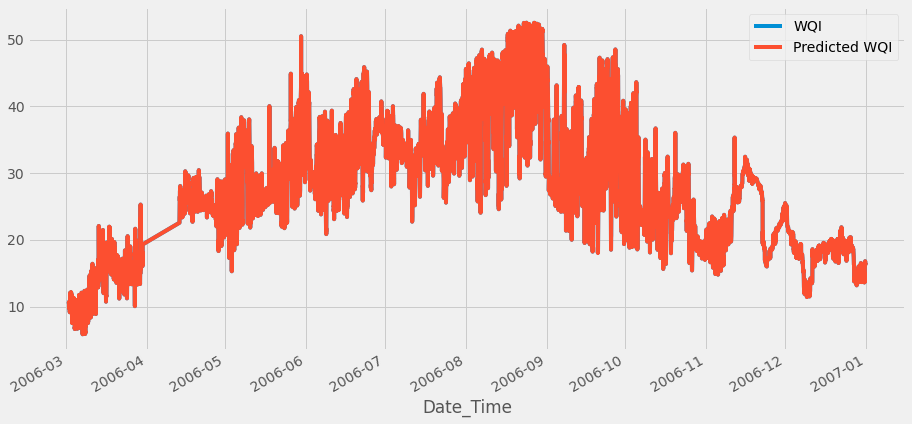

In [198]:
df_final_model2[['WQI',  'Predicted WQI' ]].plot();

In [224]:
test_generator[0]

(array([[[0.04901961, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.0806136 ],
         [0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.08027209],
         [0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.08017604],
         ...,
         [0.05555556, 0.36666667, 0.5       , ..., 0.36666667,
          0.0018797 , 0.0982825 ],
         [0.05555556, 0.36666667, 0.5       , ..., 0.36666667,
          0.0018797 , 0.09823447],
         [0.05228758, 0.36666667, 0.5       , ..., 0.36666667,
          0.0018797 , 0.09779691]],
 
        [[0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.08027209],
         [0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.08017604],
         [0.04575163, 0.4       , 0.5       , ..., 0.36666667,
          0.00234962, 0.0860846 ],
         ...,
         [0.05555556, 0.36666667, 0.5       , ..., 0.36666667,
          0.0018797 , 0.